In [215]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn import preprocessing

In [216]:
train_data = pd.read_csv('/Users/Xuanshao/Downloads/train.csv')
test_data = pd.read_csv('/Users/Xuanshao/Downloads/test.csv')
id_list = test_data["PassengerId"]
train_data = train_data.drop(['PassengerId'], axis=1)
test_data = test_data.drop(['PassengerId'], axis=1)

In [217]:
train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [218]:
test_data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [219]:
train_data.info() #Age, Cabin, Embarked

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 76.6+ KB


In [220]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
Pclass      418 non-null int64
Name        418 non-null object
Sex         418 non-null object
Age         332 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Ticket      418 non-null object
Fare        417 non-null float64
Cabin       91 non-null object
Embarked    418 non-null object
dtypes: float64(2), int64(3), object(5)
memory usage: 32.7+ KB


In [221]:
#Title info
data = pd.concat([train_data.drop('Survived',1),test_data])
data['Title'] = data.Name.str.extract('([A-Za-z]+)\.', expand=False)
Counter(data['Title']).most_common()

[('Mr', 757),
 ('Miss', 260),
 ('Mrs', 197),
 ('Master', 61),
 ('Dr', 8),
 ('Rev', 8),
 ('Col', 4),
 ('Major', 2),
 ('Mlle', 2),
 ('Ms', 2),
 ('Sir', 1),
 ('Mme', 1),
 ('Dona', 1),
 ('Capt', 1),
 ('Countess', 1),
 ('Don', 1),
 ('Lady', 1),
 ('Jonkheer', 1)]

In [222]:
#Title extract
def title_extract(data):
    data['Title'] = data.Name.str.extract('([A-Za-z]+)\.', expand=False)
    data['Title'] = data['Title'].replace(['Lady', 'Countess', 'Capt', 'Col',
        'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    data['Title'] = data['Title'].replace(['Mlle', 'Ms'], 'Miss')
    data['Title'] = data['Title'].replace('Mme', 'Mrs')
    title_map = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
    data['Title'] = data['Title'].map(title_map).astype(int)
    return data.drop('Name', axis=1) 

train_data = title_extract(train_data)
test_data = title_extract(test_data)

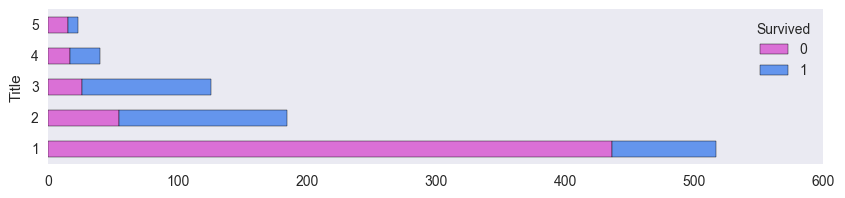

In [223]:
temp = pd.crosstab(train_data.Title, train_data.Survived)
temp.plot(kind='barh', stacked=True, color=['orchid','cornflowerblue'], grid=False, figsize=(10, 2))

In [224]:
#Cabin info
data['Cabin'] = data['Cabin'].fillna('X')
data['Cabin'] = data['Cabin'].apply(lambda x: str(x)[0])
Counter(data['Cabin']).most_common()

[('X', 1014),
 ('C', 94),
 ('B', 65),
 ('D', 46),
 ('E', 41),
 ('A', 22),
 ('F', 21),
 ('G', 5),
 ('T', 1)]

In [225]:
#Cabin extract
def cabin_extract(data):
    data['Cabin'] = data['Cabin'].fillna('X')
    data['Cabin'] = data['Cabin'].apply(lambda x: str(x)[0])
    data['Cabin'] = data['Cabin'].replace(['A', 'D', 'E', 'T'], 'M')
    data['Cabin'] = data['Cabin'].replace(['B', 'C'], 'H')
    data['Cabin'] = data['Cabin'].replace(['F', 'G'], 'L')
    data['Cabin'] = data['Cabin'].map({'X': 0, 'L': 1, 'M': 2, 'H': 3}).astype(int)
    return data

train_data = cabin_extract(train_data)
test_data = cabin_extract(test_data)

In [226]:
#Embarked
def fill_missing_embarked(data):
    freq_port = data['Embarked'].mode()[0]
    data['Embarked'] = data['Embarked'].fillna(freq_port)
    data['Embarked'] = data['Embarked'].map({'S': 0, 'Q': 1, 'C': 2}).astype(int)
    return data

train_data = fill_missing_embarked(train_data)
test_data = fill_missing_embarked(test_data)

//anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


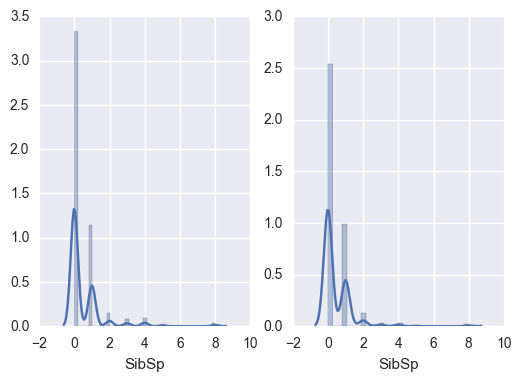

In [227]:
plt.subplot(1, 2, 1)
sns.distplot(train_data['SibSp'])

plt.subplot(1, 2, 2)
sns.distplot(test_data['SibSp'])

//anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


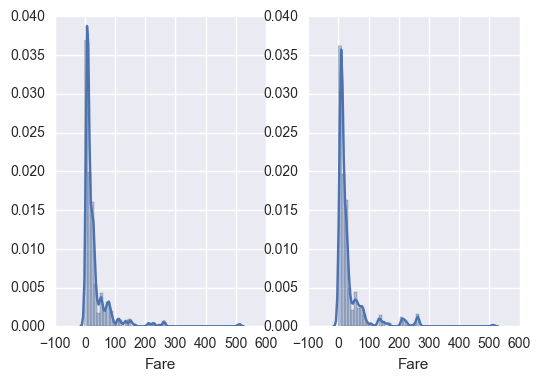

In [228]:
plt.subplot(1, 2, 1)
sns.distplot(train_data['Fare'])

plt.subplot(1, 2, 2)
fare_mean = train_data['Fare'].mean()
test_data['Fare']=test_data['Fare'].fillna(fare_mean)
sns.distplot(test_data['Fare'])

In [229]:
#Transform
#SibSp, Fare → right skewed
train_data['SibSp_t']=preprocessing.scale(np.sqrt(train_data['SibSp']))
test_data['SibSp_t']=preprocessing.scale(np.sqrt(test_data['SibSp'])) 

In [230]:
def fill_missing_age(train_set, test_set):
    
    train_dropped = train_set[['Pclass', 'SibSp', 'Fare', 'Cabin', 'Age']]
    test_dropped = test_set[['Pclass', 'SibSp', 'Fare', 'Cabin', 'Age']]
    combine = pd.concat([train_dropped,test_dropped])
    # training regression model
    train = combine[combine.Age.notnull()]
    model = LinearRegression()
    model.fit(train.drop(['Age'], axis=1), train['Age'])
    
    data = combine.loc[combine.Age.isnull()]
    predict_ages = model.predict(data.drop('Age', axis=1))
    combine.loc[combine.Age.isnull(), 'Age'] = predict_ages
    combine['Age'] = combine['Age'].astype(int)
    train_set['Age'] = combine.iloc[:len(train_set)]['Age']
    test_set['Age'] = combine.iloc[len(train_set):]['Age']

    return train_set, test_set

train_data, test_data = fill_missing_age(train_data, test_data)

In [231]:
#Normalize
def feature_normalization(feat_vector):
    max_value = max(feat_vector)
    min_value = min(feat_vector)
    mean_value = feat_vector.mean()
    return (feat_vector - mean_value) / (max_value - min_value)

In [232]:
def age_extract(data):
    
    data.loc[data['Age'] < 16, 'Age'] = 1
    data.loc[(data['Age'] < 35) & (data['Age'] > 15.9), 'Age'] = 2
    data.loc[(data['Age'] < 64) & (data['Age'] > 34.9), 'Age'] = 3
    data.loc[data['Age'] > 63.9, 'Age'] = 4
    data['Age'] = data['Age'].astype(int)
    return data

train_data = age_extract(train_data)
test_data = age_extract(test_data)

In [233]:
data = pd.concat([train_data.drop(['Survived'],1),test_data])
data = data.drop(['SibSp'],1)
data = data.drop(['Ticket'],1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 9 columns):
Pclass      1309 non-null int64
Sex         1309 non-null object
Age         1309 non-null int64
Parch       1309 non-null int64
Fare        1309 non-null float64
Cabin       1309 non-null int64
Embarked    1309 non-null int64
Title       1309 non-null int64
SibSp_t     1309 non-null float64
dtypes: float64(2), int64(6), object(1)
memory usage: 102.3+ KB


In [234]:
#Sex
data['Sex'] = data['Sex'].map({'female': 1, 'male':0})
data['Sex'] = data['Sex'].astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 9 columns):
Pclass      1309 non-null int64
Sex         1309 non-null int64
Age         1309 non-null int64
Parch       1309 non-null int64
Fare        1309 non-null float64
Cabin       1309 non-null int64
Embarked    1309 non-null int64
Title       1309 non-null int64
SibSp_t     1309 non-null float64
dtypes: float64(2), int64(7)
memory usage: 102.3 KB


In [235]:
#normalize Fare and SibSp_t
data['Fare']=feature_normalization(data['Fare'])
data['SibSp_t']=feature_normalization(data['SibSp_t'])

In [236]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         891 non-null int64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       891 non-null int64
Embarked    891 non-null int64
Title       891 non-null int64
SibSp_t     891 non-null float64
dtypes: float64(2), int64(8), object(2)
memory usage: 83.6+ KB


In [237]:
Survived = train_data['Survived']
train_data = data.iloc[:len(train_data)]
train_data['Survived'] = Survived
test_data = data.iloc[len(train_data):]

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [238]:
rf = RandomForestClassifier()
rf.fit(train_data.drop(['Survived'], axis=1), train_data['Survived'])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [239]:
lr = LogisticRegression()
lr.fit(train_data.drop(['Survived'], axis=1), train_data['Survived'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [240]:
knn = KNeighborsClassifier()
knn.fit(train_data.drop(['Survived'], axis=1), train_data['Survived'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [243]:
eclf1 = VotingClassifier(estimators=[
        ('lr', lr), ('rf', rf), ('knn', knn)], voting='soft', weights=[1, 2, 1])
eclf1 = eclf1.fit(train_data.drop(['Survived'], axis=1), train_data['Survived'])
results = eclf1.predict(test_data)
output = pd.DataFrame({'PassengerId': id_list, "Survived": results})
output.to_csv('prediction.csv', index=False)